In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [5]:
# https://pastelsky.github.io/covid-19-mobility-tracker/output/US/mobility-parks.csv
# https://pastelsky.github.io/covid-19-mobility-tracker/output/US/NY/mobility-parks.csv
mobility_data_url = 'https://pastelsky.github.io/covid-19-mobility-tracker/output/US/{state}/mobility-{place}.csv'

states = ['NY', 'MA']
places = ['grocery-and-pharmacy', 'parks', 'residential', 'retail-and-recreation', 'transit-stations', 'workplaces']

In [75]:
df_state = pd.DataFrame()
for state in states:
    df_place = pd.DataFrame()
    for place in places:
        url = mobility_data_url.format(state=state, place=place)
        df = pd.read_csv(url, parse_dates=True, index_col = 'date', names=['date', place], header=0)
        if df_place.shape[0] == 0:
            df_place = df
        else:
            df_place = df_place.merge(df, left_index=True, right_index = True)
    df_place['state'] = state
    df_state = pd.concat([df_state, df_place], axis = 0)
display(df_state.head(5))

,grocery-and-pharmacy,parks,residential,retail-and-recreation,transit-stations,workplaces,state
date,,,,,,,
2020-04-05,-28,-11,15,-59,-68,-47,NY
2020-04-04,-21,-5,18,-58,-65,-47,NY
2020-04-03,-22,-53,29,-57,-69,-61,NY
2020-04-02,-20,-28,27,-54,-69,-62,NY
2020-04-01,-18,-14,26,-52,-67,-61,NY


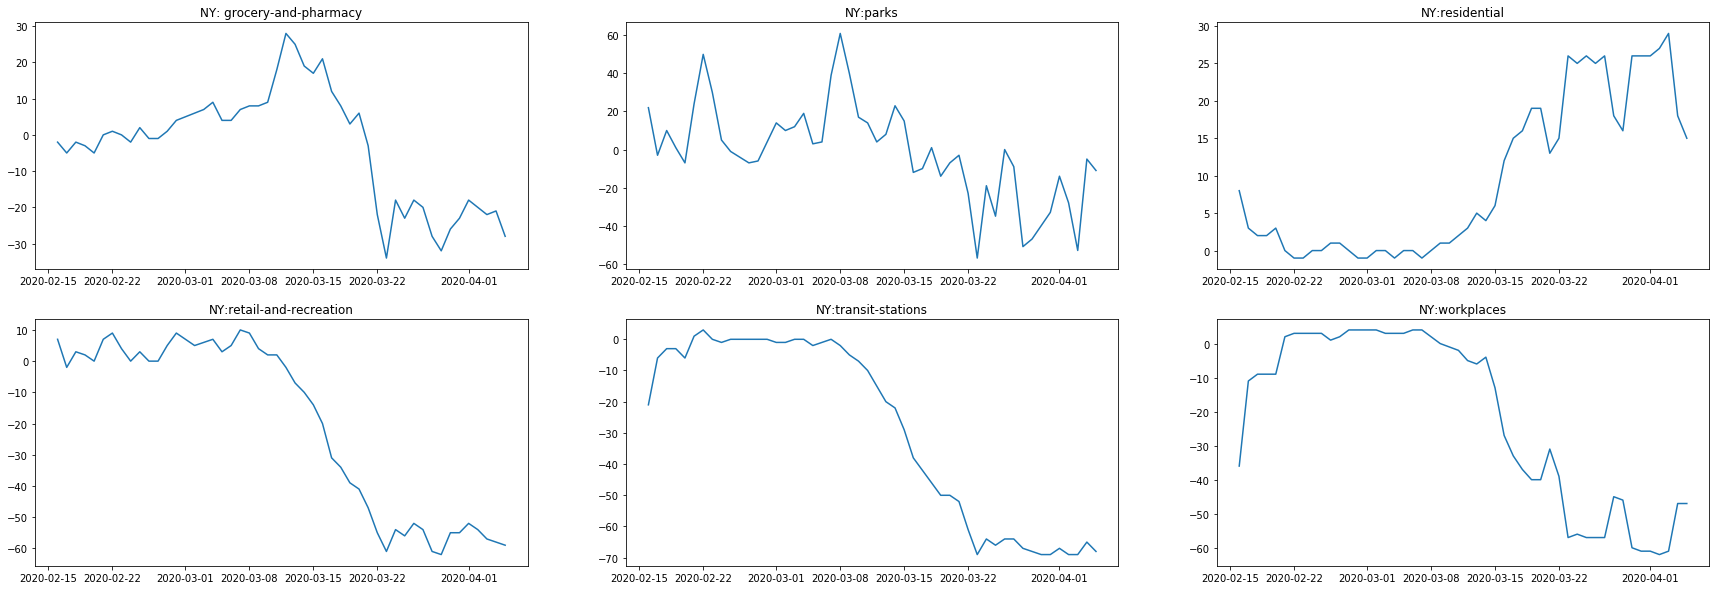

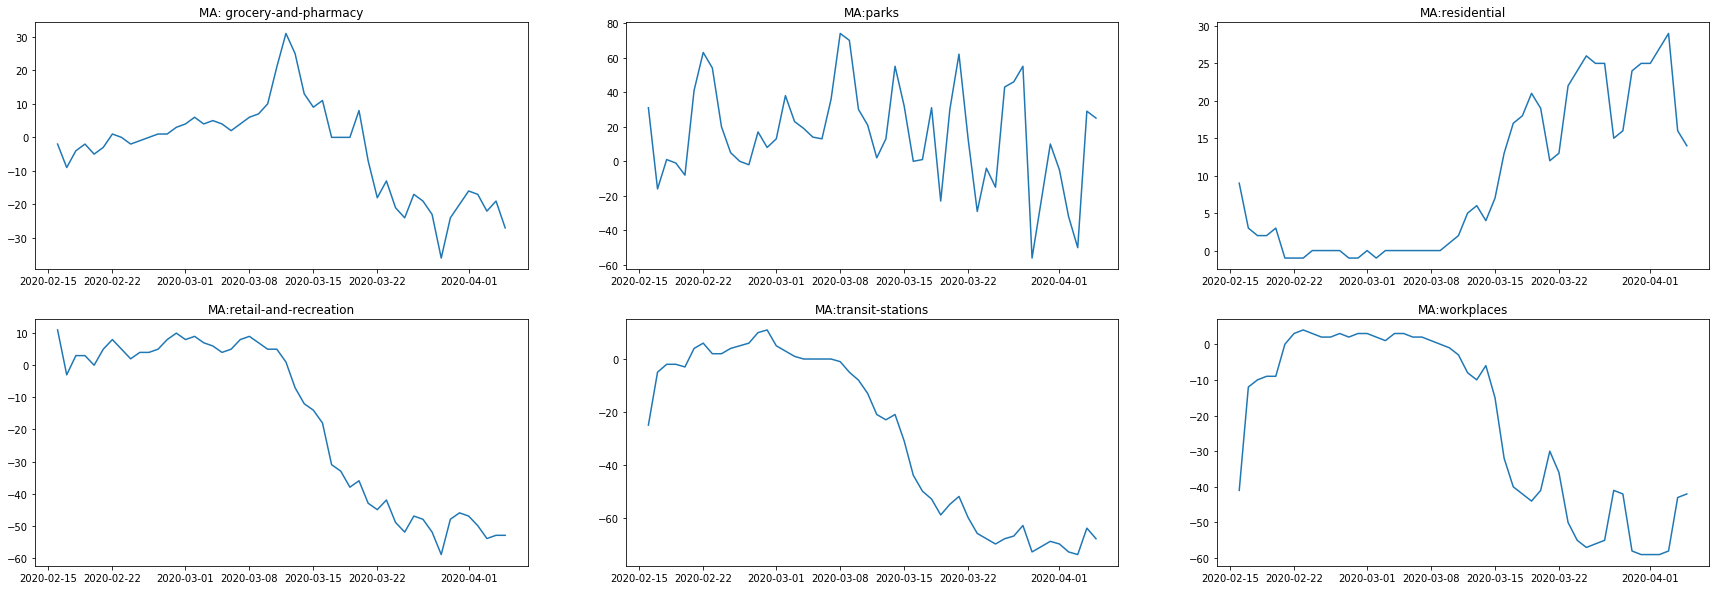

In [112]:
for state in states:
    fig,ax = plt.subplots(2,3, figsize=(30,10))
    # figure()
    ax[0][0].plot(df_state[df_state['state'] == state]['grocery-and-pharmacy'])
    ax[0][0].set_title('{}: grocery-and-pharmacy'.format(state))
    ax[0][1].plot(df_state[df_state['state'] == state]['parks'])
    ax[0][1].set_title('{}:parks'.format(state))
    ax[0][2].plot(df_state[df_state['state'] == state]['residential'])
    ax[0][2].set_title('{}:residential'.format(state))

    ax[1][0].plot(df_state[df_state['state'] == state]['retail-and-recreation'])
    ax[1][0].set_title('{}:retail-and-recreation'.format(state))
    ax[1][1].plot(df_state[df_state['state'] == state]['transit-stations'])
    ax[1][1].set_title('{}:transit-stations'.format(state))
    ax[1][2].plot(df_state[df_state['state'] == state]['workplaces'])
    ax[1][2].set_title('{}:workplaces'.format(state))